In [2]:
import numpy as np
import h5py


## load the table
class interpolate:
    def init(self):
        pass

    def load_table(self):
        '''
        This is a method for swift data to load abundance table
        '''
        self.table = h5py.File('/cosma7/data/dp004/dc-chen3/joey_code/X_Ray_spectra_more_z_all.hdf5', 'r')
        self.X_Ray = self.table['spectra'][()]

        self.table_lines = h5py.File('/cosma7/data/dp004/dc-chen3/joey_code/X_Ray_spectra_more_z_lines.hdf5', 'r')
        self.X_Ray_lines = self.table_lines['spectra'][()]

        self.table_cont = h5py.File('/cosma7/data/dp004/dc-chen3/joey_code/X_Ray_spectra_more_z_cont.hdf5', 'r')
        self.X_Ray_cont = self.table_cont['spectra'][()]

        self.xray_energies = self.table['xray_energies'][()]
        self.He_bins = self.table['/Bins/He_bins'][()]
        self.missing_elements = self.table['/Bins/Missing_element'][()]
        self.element_masses = self.table['Bins/Element_masses'][()]

        self.density_bins = self.table['/Bins/Density_bins/'][()]
        self.temperature_bins = self.table['/Bins/Temperature_bins/'][()]
        self.redshift_bins = self.table['/Bins/Redshift_bins'][()]
        self.dn = 0.2
        self.dT = 0.1
        self.dz = 0.2

        self.solar_metallicity = self.table['/Bins/Solar_metallicities/'][()]

In [3]:
# load table
interp = interpolate()
print('loading table')
interp.load_table()
print('table_loaded')


loading table
table_loaded


In [4]:
e = interp.xray_energies
n = interp.density_bins
T = interp.temperature_bins
lines = interp.X_Ray_lines[0,-1,:,:,:,:]
lines_all = np.sum(10**lines, axis=0)

In [5]:
lines = {'fe17':0.725,'o7r':0.575,'o8':0.654}
line_dict = {}
for line in ['o7r', 'o8', 'fe17']:
    msk = np.argmin(abs(e-lines[line]))
    line_dict[line] = lines_all[:,:,msk]
    

/tmp/ipykernel_87933/3913791163.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(im)


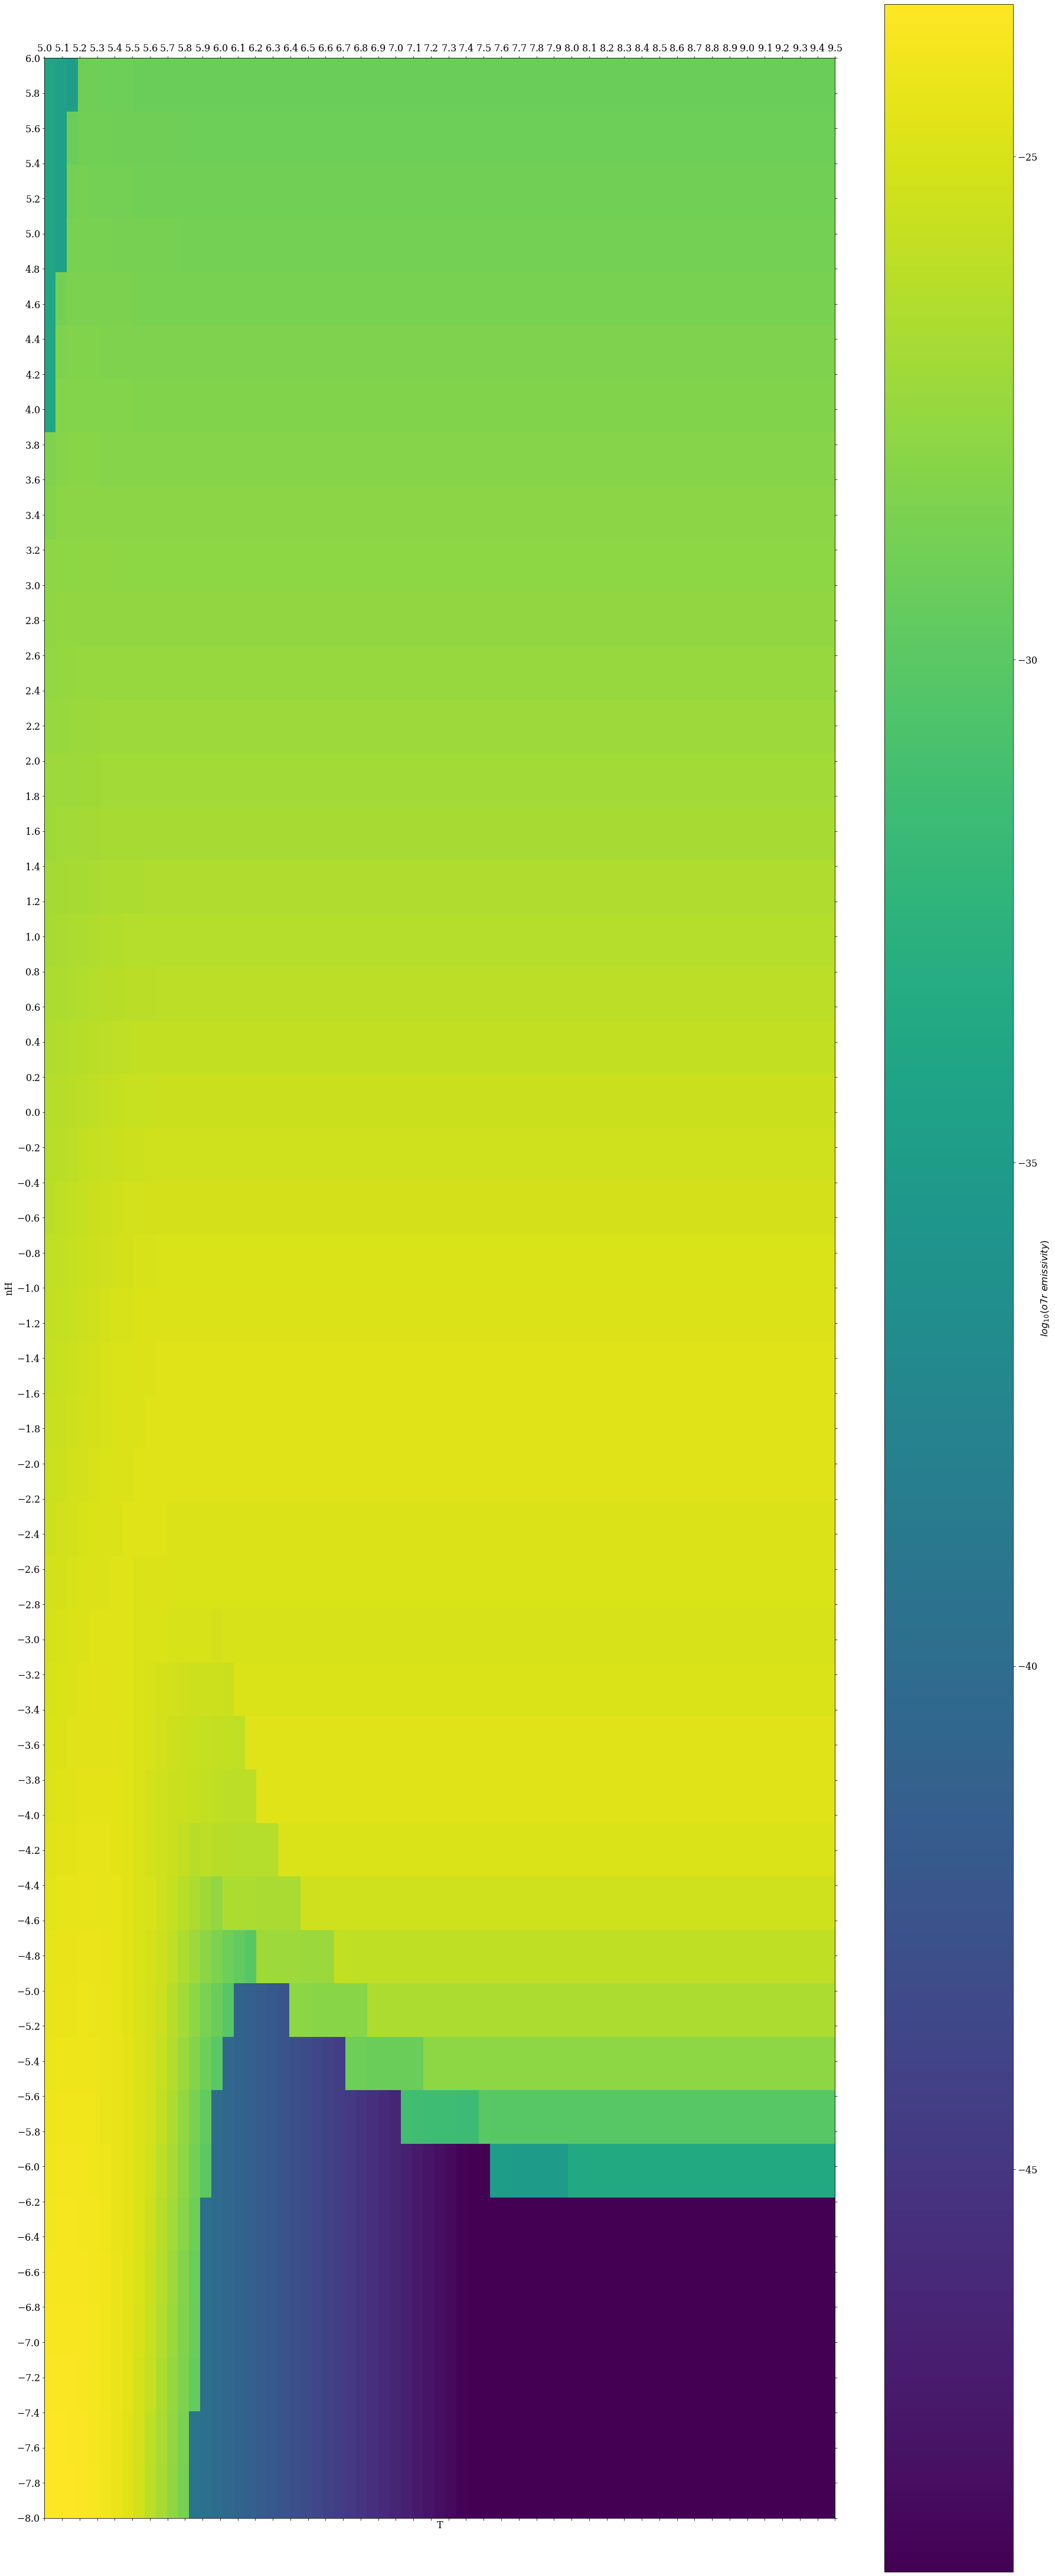

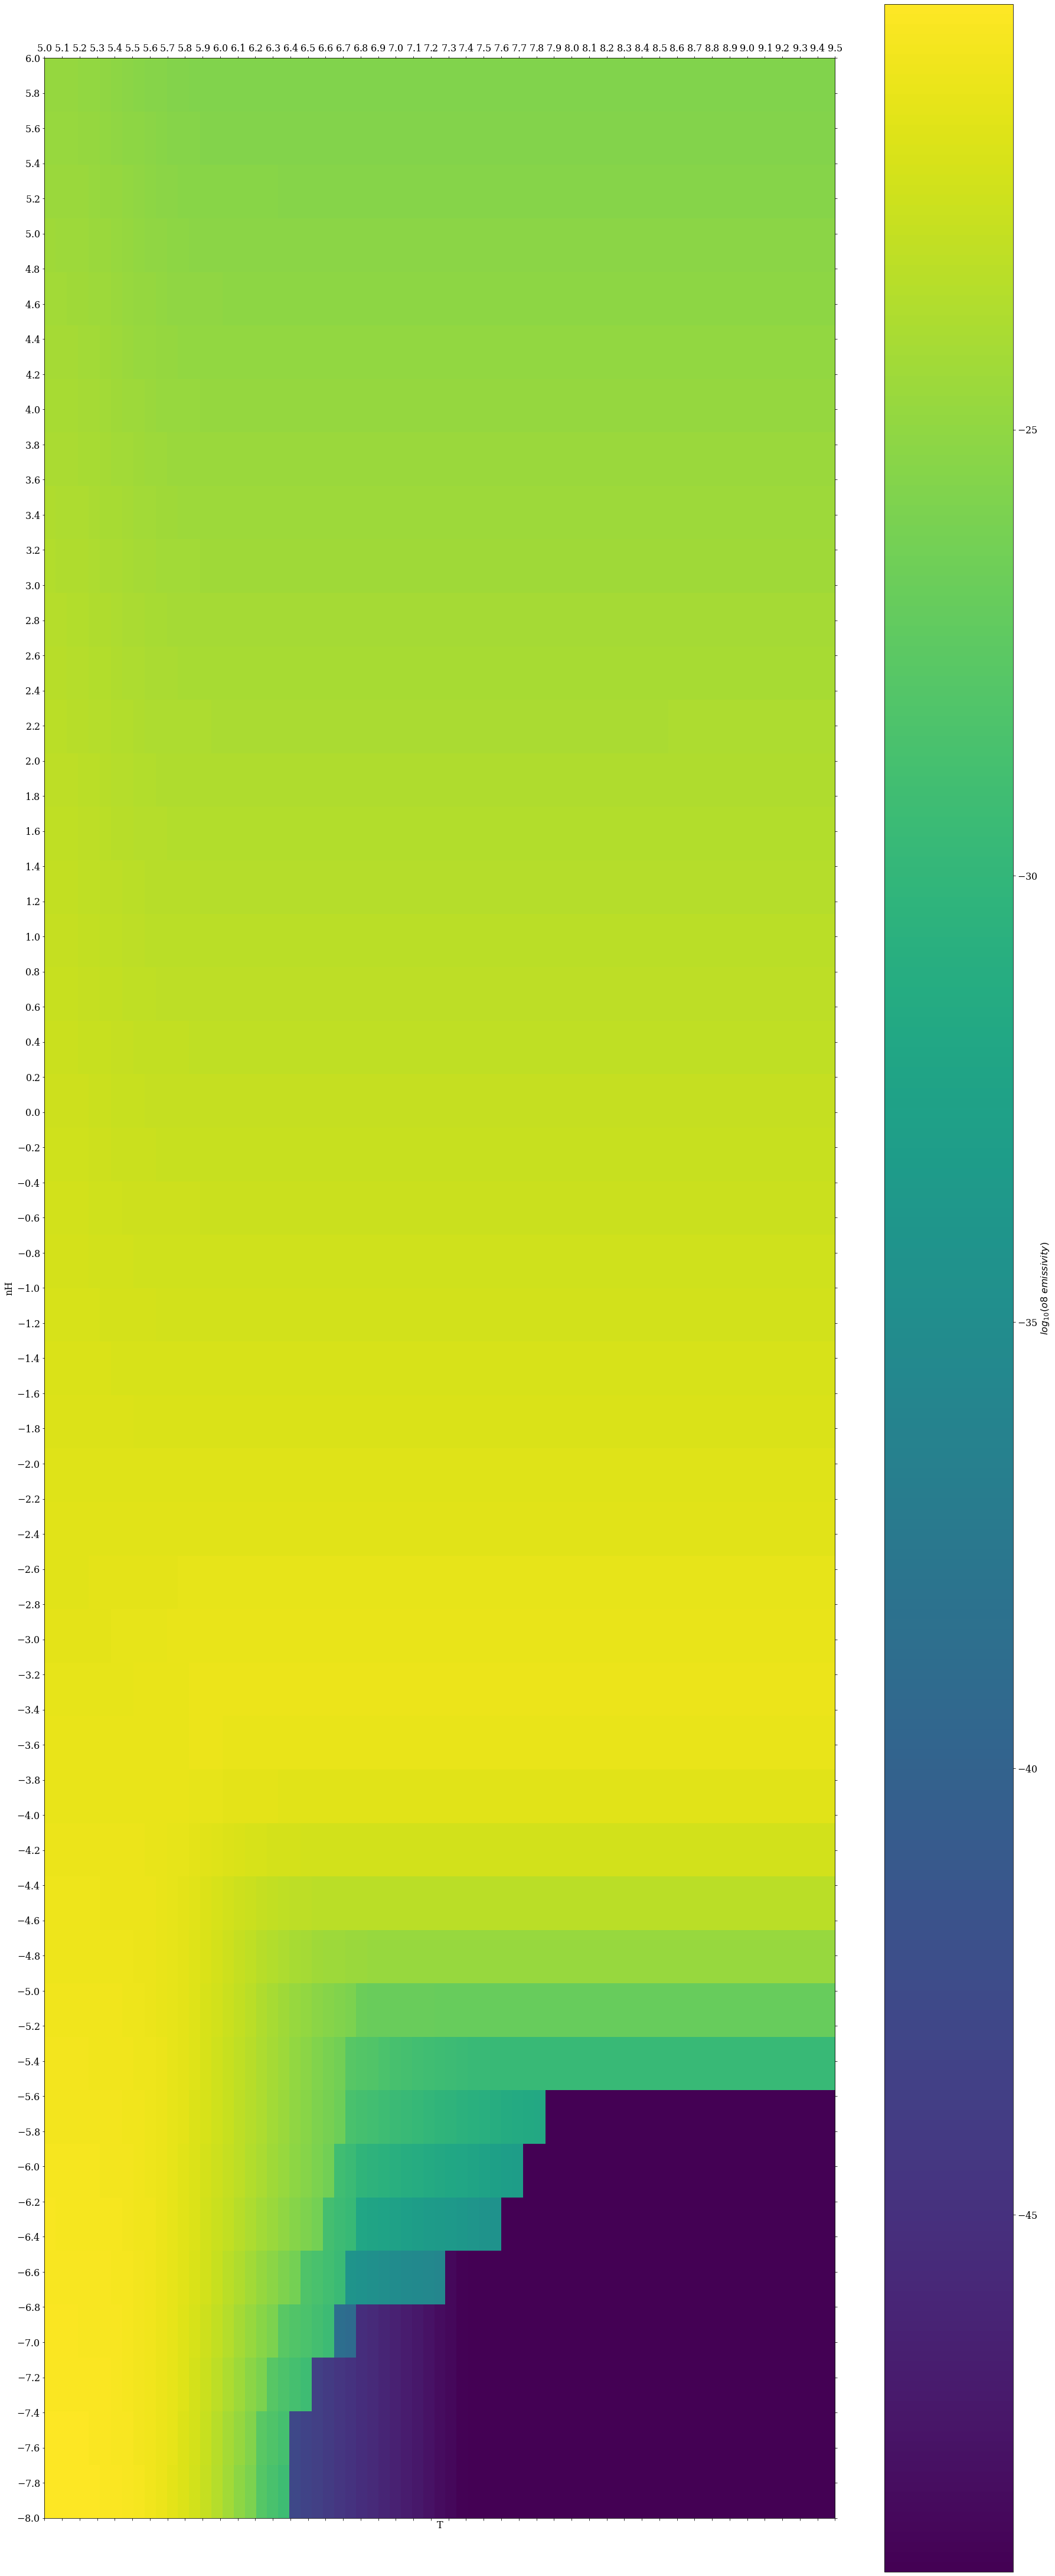

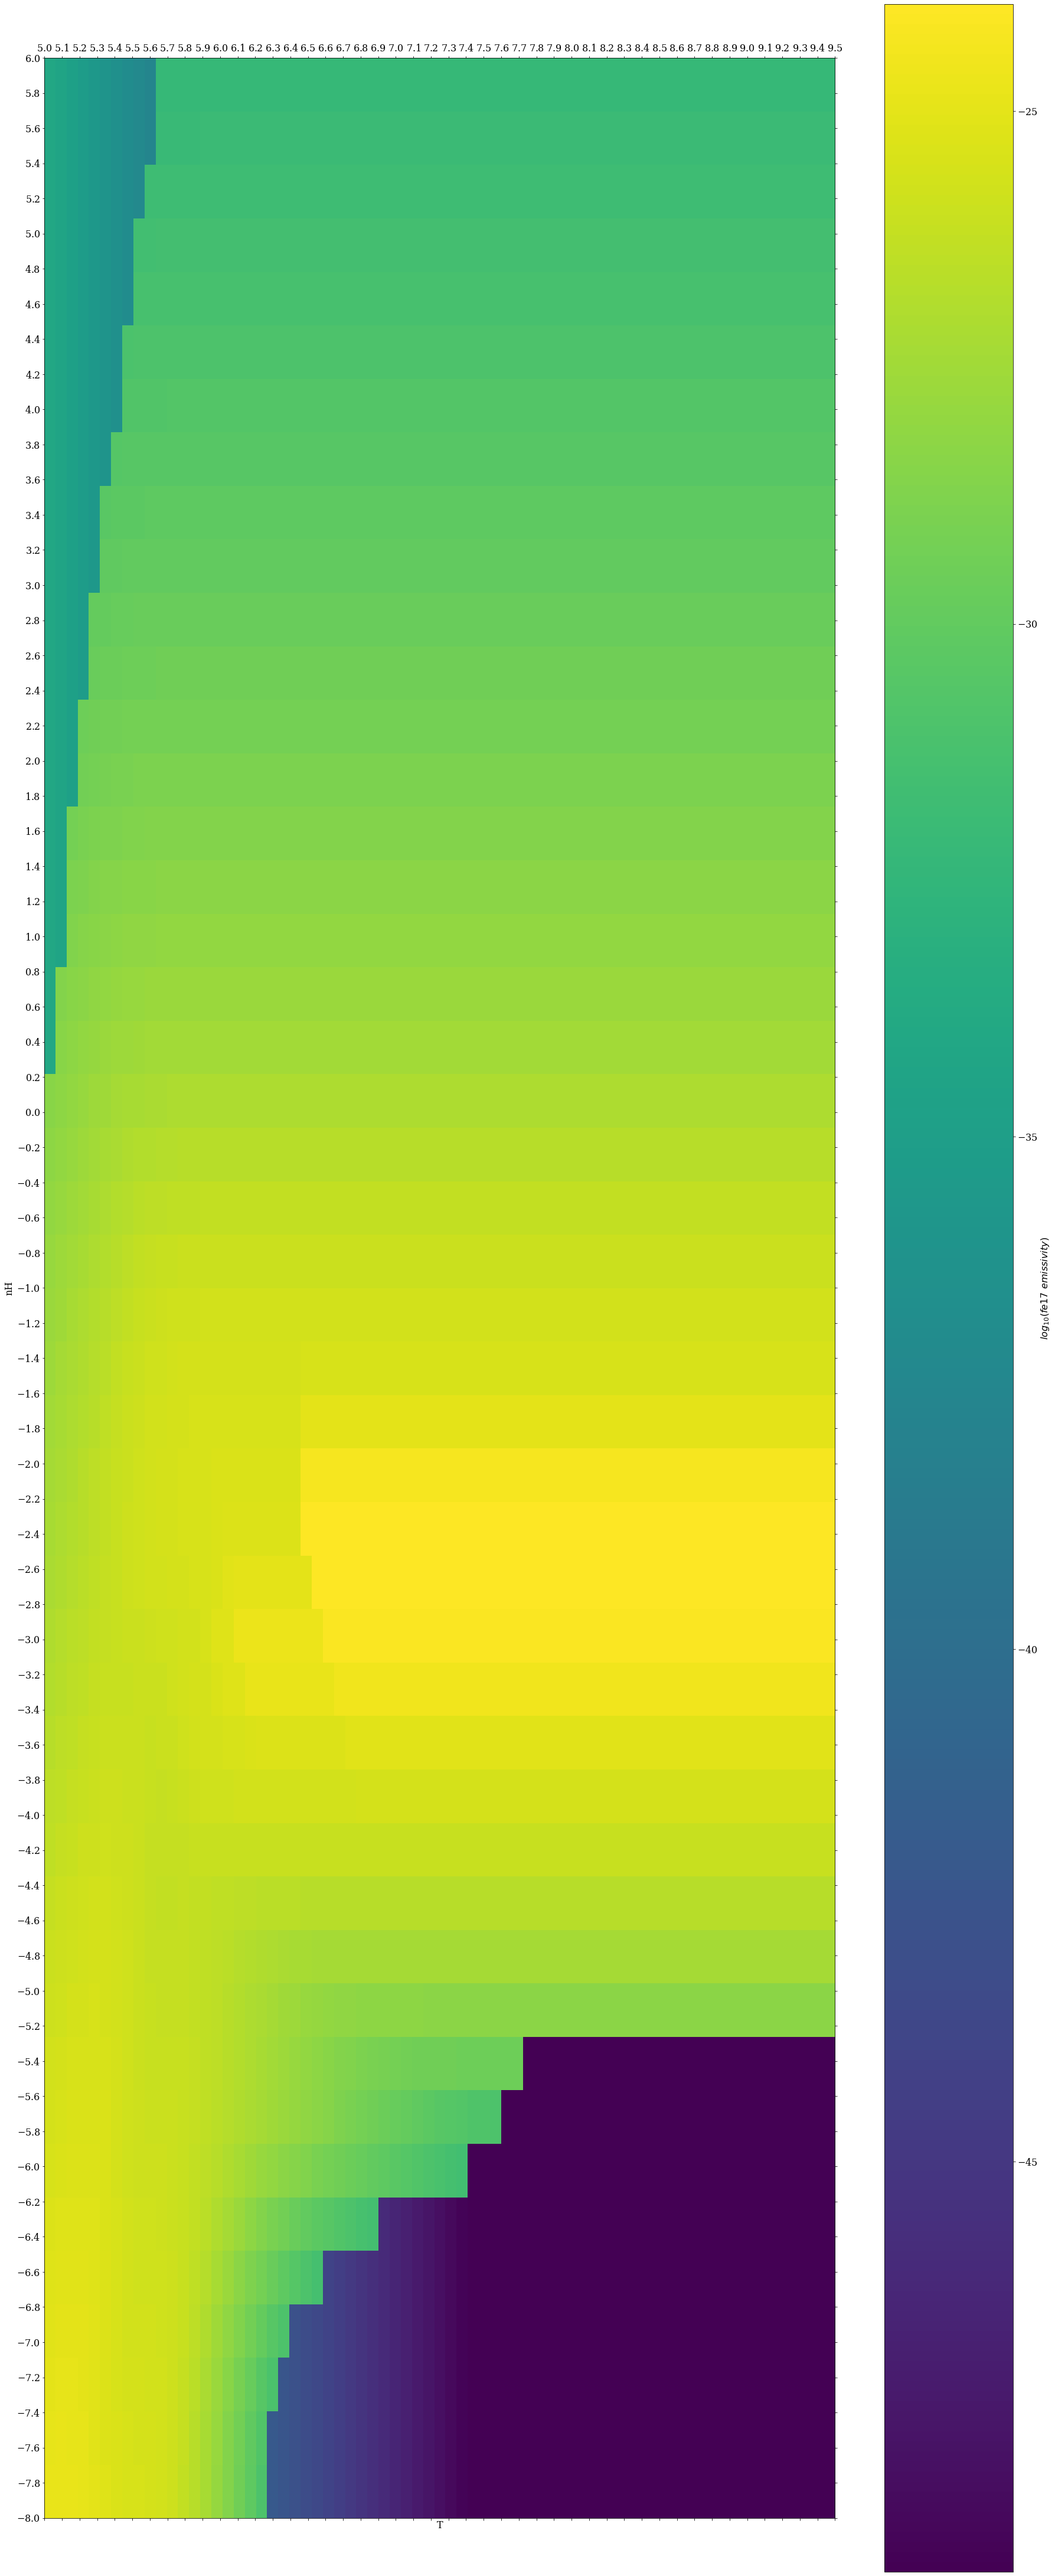

In [10]:


for line in ['o7r', 'o8', 'fe17']:
    fig,ax = plt.subplots(figsize = (30,80))
    im = ax.matshow(np.log10(line_dict[line]),  extent=[T.min(),T.max(), n.min(), n.max()], origin='lower')
    ax.set_ylabel('nH')
    ax.set_xlabel('T')
    ax.set_xticks(T)
    ax.set_yticks(n)
    # Add grid lines
    ax.grid(True)
    # Disable the grid for the color bar
    ax.grid(False)
    cbar = fig.colorbar(im)
    cbar.set_label(f'$log_{{10}}({line}\  emissivity)$')
    fig.patch.set_facecolor('white')
    
    plt.savefig(f'{line}_emissivity_vs_T_n.png', bbox_inches='tight', facecolor='white')
    plt.show()
    plt.close()


In [ ]:
n.shape

In [ ]:
# check the solar abundances in table
#[H, He, C, N, O, Ne, Mg, Si, Fe]
print(interp.solar_metallicity)

In [ ]:
# calculate the bias of single element vs all element
O = 10**interp.solar_metallicity[4]
Fe = 10**interp.solar_metallicity[-1]
all = np.sum(10**interp.solar_metallicity[2:])
print(O, Fe, all)

In [ ]:
e = interp.xray_energies
n = interp.density_bins
T = interp.temperature_bins
print(n[30], T[20])
for i in range(10):
    lines = interp.X_Ray_lines[0,-1,:,20,25,:]
    print(lines)
    print(10 ** lines)
lines = np.sum(10**lines, axis=0)
print(lines)

In [ ]:
msk = (12.398/e<18)& (12.398/e>14)
np.arange(len(e))[msk]

In [ ]:
# sweep different He bins, temperatures and densities
import matplotlib.pyplot as plt
i = 0
for j in np.arange(15,35):
    for k in np.arange(20,30):
        lines = interp.X_Ray_lines[0,i,:,j,k,:]
        lines = np.sum(10** lines, axis=0)

        fig,ax = plt.subplots(2,1, figsize = (8,6))
        ax[0].step(12.398/e[msk], lines[msk])
        ax[1].step(e[msk], lines[msk])
        ax[1].axis([12.398/14, 12.398/18, 1e-28, 1e-18])

        ax[0].set_yscale('log')
        ax[0].set_xlabel('Angstorm')
        ax[1].set_xlabel('keV')
        ax[0].set_ylabel('line emissivity $\\rm ergs\ cm^3\ s^{-1}$')
        # ax[1].set_ylabel('line emissivity $\\rm ergs\ cm^3\ s^{-1}$')
        ax[0].axvline(15.01, c = 'k')
        ax[0].axvline(17.05, c = 'k')
        ax[1].axvline(0.826, c = 'k')
        ax[1].axvline(12.398/17.05, c = 'k')
        ax[1].set_yscale('log')
        ax[0].set_xlim(14,18)
        ax[0].set_ylim(1e-28, 1e-18)
        ax[1].set_ylim(1e-28, 1e-18)
        plt.suptitle(f'$\\rm {interp.He_bins[i]:.2f} T = 10^{interp.temperature_bins[j]:.2f}K\  nH = 10^{interp.density_bins[k]:.2f}cm^{-3}$')
        plt.show()
        plt.close()

In [ ]:
f = h5py.File('/cosma7/data/dp004/dc-chen3/joey_code/X_Ray_spectra_more_z_all.hdf5')

In [ ]:
f['spectra'].attrs.keys()

In [7]:
import matplotlib.pyplot as plt
def basic_figure_style():
    SMALL_SIZE = 5*4                                       
    MEDIUM_SIZE = 8*2
    BIGGER_SIZE = 10*4

    plt.rc('font', size=MEDIUM_SIZE, family='serif')          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)                     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)                    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)                  # fontsize of the figure title
    plt.rc('lines', linewidth=3) 
    plt.rc('axes', grid=True) #
    plt.rc('grid', alpha=0.7) #
    plt.rc('xtick', top=True)
    plt.rc('ytick', right=True)
    plt.rc('axes.formatter', use_mathtext=True, min_exponent=4, useoffset=False)
    plt.rc('figure', figsize='6, 6')                         # size of the figure, used to be '4, 3' in inches
    ######################################################
basic_figure_style()
